In [67]:
from Ecommerce_Analytics.utils.paths import data_raw_dir
from Ecommerce_Analytics.plot import plot_completeness_barplot, plot_uniqueness_barplot
import pandas as pd
import numpy as np

In [68]:
raw_data_path = data_raw_dir("customer.csv")
customer_df = pd.read_csv(raw_data_path)
customer_df.head()

,customer_id,order_city,order_postal,order_state,latitude,longitude
0,18287,Rock Springs,82901-7321,WY,41.5869,-109.2048
1,18283,JACKSON,83001-9460,WY,43.4800,-110.7618
2,18282,Greybull,82426,WY,44.4892,-108.0562
3,18281,EVANSTON,82930-4706,WY,41.2680,-110.9633
4,18280,CHEYENNE,82001-7901,WY,41.1400,-104.8202


In [69]:
raw_data_path = data_raw_dir("state.csv")
state_df = pd.read_csv(raw_data_path)
state_df.head()

,order_state,state_abbreviation,region,state
0,AE,AE,Other,Armed Forces Europe
1,ak,AK,Other,Alaska
2,AK,AK,Other,Alaska
3,AL,AL,East,Alabama
4,ALABAMA,AL,East,Alabama


In [70]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   4372 non-null   int64  
 1   order_city    4372 non-null   object 
 2   order_postal  4372 non-null   object 
 3   order_state   4372 non-null   object 
 4   latitude      4282 non-null   float64
 5   longitude     4282 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 205.1+ KB


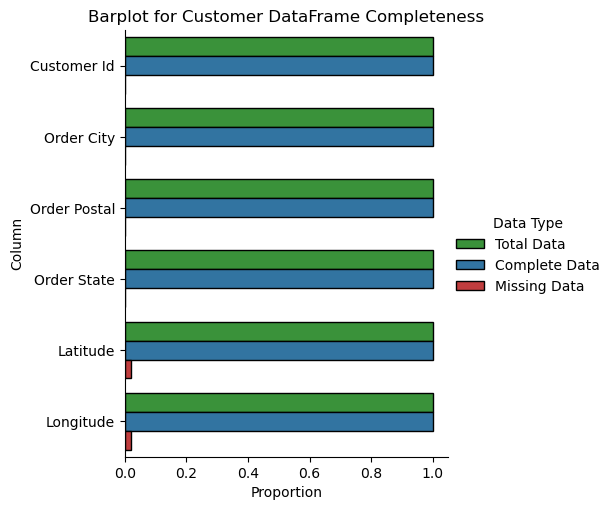

In [71]:
customer_df_columns = list(customer_df.columns)
plot_completeness_barplot(df=customer_df,column=customer_df_columns,df_name="Customer")

In [72]:
duplicated_rows = customer_df.duplicated(keep=False)
customer_df[duplicated_rows]

,customer_id,order_city,order_postal,order_state,latitude,longitude


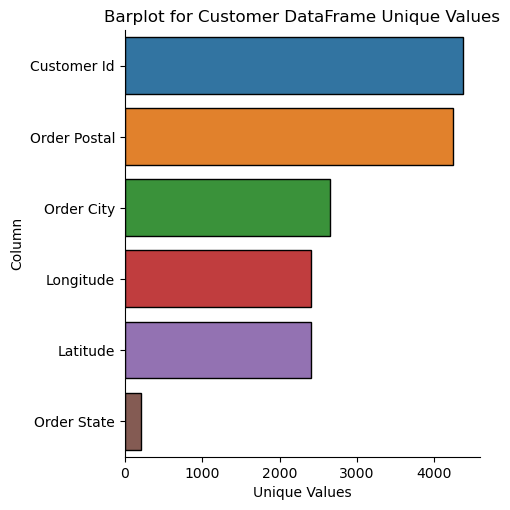

In [73]:
plot_uniqueness_barplot(df=customer_df,column=customer_df_columns,df_name="Customer")

In [74]:
customer_df["order_state"].unique()

array(['WY', 'WV', 'Wisconsin', 'WI', 'wi', 'Wi', 'WEST VIRGINIA',
       'WASHINGTON', 'Washington', 'WA', 'wa', 'Wa', 'VT', 'VIRGINIA',
       'Virginia', 'VERMONT', 'Va.', 'VA', 'va', 'Va', 'UTAH', 'Utah',
       'UT', 'Tx', 'TX', 'tx', 'TN', 'tn', 'Texas', 'TEXAS', 'texas',
       'Tennessee', 'TENNESSEE', 'South Carolina', 'SOUTH CAROLINA', 'SD',
       'SC', 'sc', 'RI', 'ri', 'Rhode Island', 'RHODE ISLAND', 'ALASKA',
       'Alaska', 'Delaware', 'DE', 'Pennsylvania', 'PENNSYLVANIA', 'Pa.',
       'PA', 'Pa', 'pa', 'OREGON', 'Oregon', 'OR', 'or', 'Or', 'OKLAHOMA',
       'Oklahoma', 'OK', 'Ok', 'ok', 'Ohio', 'OHIO', 'OH', 'oh', 'NY',
       'ny', 'Ny', 'NV', 'North Carolina', 'NORTH CAROLINA', 'NM', 'NJ',
       'nj', 'Nj', 'NH', 'nh', 'NEW YORK', 'new york', 'New York',
       'New Mexico', 'NEW MEXICO', 'New Jersey', 'new jersey',
       'NEW JERSEY', 'New Hampshire', 'NEVADA', 'Nebraska', 'NE', 'Ne',
       'ND', 'NC', 'nc', 'N.Y.', 'N.C.', 'n.c.', 'MT', 'MS', 'MONTANA',
      

In [75]:
state_df["order_state"] = state_df["order_state"].str.replace(r"[,.:;_\-]", "", regex=True).str.capitalize()
state_df["state"] = state_df["state"].str.replace(r"[,.:;_\-]", "", regex=True).str.capitalize()

customer_df["order_state"] = customer_df["order_state"].str.replace(r"[,.:;_\-]", "", regex=True).str.capitalize()
map1 = dict(state_df[["order_state", "state_abbreviation"]].drop_duplicates().values)
map2 = dict(state_df[["state", "state_abbreviation"]].drop_duplicates().values)
mapping = map1 | map2
customer_df["order_state"] = customer_df["order_state"].replace(mapping)

customer_df["order_state"].unique()

array(['WY', 'WV', 'WI', 'WA', 'VT', 'VA', 'UT', 'TX', 'TN', 'SC', 'SD',
       'RI', 'AK', 'DE', 'PA', 'OR', 'OK', 'OH', 'NY', 'NV', 'NC', 'NM',
       'NJ', 'NH', 'NE', 'ND', 'MT', 'MS', 'MO', 'MN', 'MI', 'ME', 'MD',
       'MA', 'LA', 'KY', 'KS', 'IA', 'IN', 'IL', 'ID', 'HI', 'GA', 'FL',
       'DC', 'CT', 'CO', 'CA', 'AZ', 'AR', 'AL'], dtype=object)

In [76]:
customer_df["order_state"] = customer_df["order_state"].astype("category")

In [77]:
customer_df["order_city"].unique()

array(['Rock Springs', 'JACKSON', 'Greybull', ..., 'Kodiak', 'anchorage',
       'ANCHORAGE'], dtype=object)

In [78]:
customer_df["order_city"] = customer_df["order_city"].replace(r"[,.:;_\-]", "", regex=True).str.capitalize()
customer_df["order_city"].unique()

array(['Rock springs', 'Jackson', 'Greybull', ..., 'Abbeville', 'Kodiak',
       'Anchorage'], dtype=object)

In [79]:
customer_df["order_city"] = customer_df["order_city"].astype("category")

In [80]:
duplicated_rows = customer_df.duplicated(keep=False)
customer_df[duplicated_rows]

,customer_id,order_city,order_postal,order_state,latitude,longitude


In [81]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   customer_id   4372 non-null   int64   
 1   order_city    4372 non-null   category
 2   order_postal  4372 non-null   object  
 3   order_state   4372 non-null   category
 4   latitude      4282 non-null   float64 
 5   longitude     4282 non-null   float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 233.9+ KB


In [82]:
raw_data_path = data_raw_dir("state.csv")
state_df = pd.read_csv(raw_data_path)
state_df.head()

,order_state,state_abbreviation,region,state
0,AE,AE,Other,Armed Forces Europe
1,ak,AK,Other,Alaska
2,AK,AK,Other,Alaska
3,AL,AL,East,Alabama
4,ALABAMA,AL,East,Alabama


In [83]:
state_df.drop(columns=["order_state"],inplace=True)
state_df.rename(columns={"state_abbreviation":"order_state"},inplace=True)

In [84]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_state  192 non-null    object
 1   region       192 non-null    object
 2   state        192 non-null    object
dtypes: object(3)
memory usage: 4.6+ KB


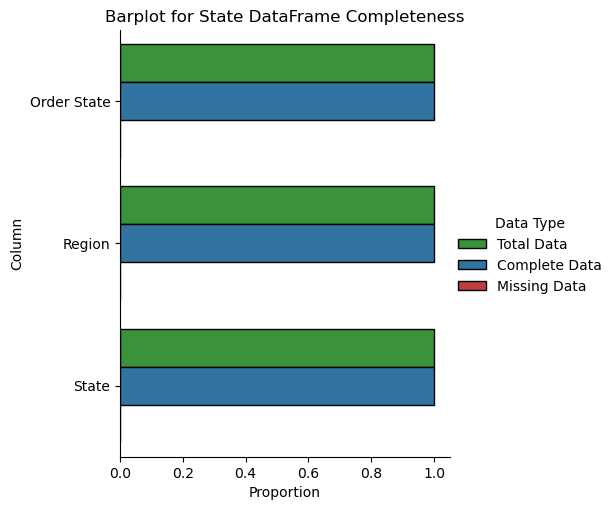

In [85]:
state_df_columns = list(state_df.columns)
plot_completeness_barplot(df=state_df,column=state_df_columns,df_name="State")

In [86]:
duplicated_rows = state_df.duplicated(keep=False)
state_df[duplicated_rows]

,order_state,region,state
1,AK,Other,Alaska
2,AK,Other,Alaska
3,AL,East,Alabama
4,AL,East,Alabama
5,AK,Other,Alaska
...,...,...,...
186,WI,Central,Wisconsin
187,WI,Central,Wisconsin
188,WI,Central,Wisconsin
189,WI,Central,Wisconsin


In [87]:
state_df.drop_duplicates(inplace=True)

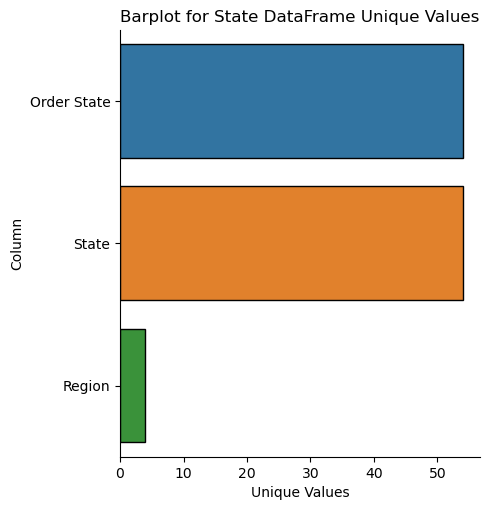

In [88]:
plot_uniqueness_barplot(df=state_df,column=state_df_columns,df_name="State")

In [89]:
state_df["state"].unique()

array(['Armed Forces Europe', 'Alaska', 'Alabama', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Connecticut', 'District of Columbia',
       'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho',
       'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Massachusetts', 'Maine', 'Maryland', 'Michigan', 'Minnesota',
       'Missouri', 'Montana', 'Mississippi', 'North Carolina', 'New York',
       'North Dakota', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Virgin Islands', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [90]:
state_df["state"] = state_df["state"].astype("category")

In [91]:
state_df["region"].unique()

array(['Other', 'East', 'Central', 'West'], dtype=object)

In [92]:
state_df["region"] = state_df["region"].astype("category")

In [93]:
state_df["order_state"].unique()

array(['AE', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'ME',
       'MD', 'MI', 'MN', 'MO', 'MT', 'MS', 'NC', 'NY', 'ND', 'NE', 'NV',
       'NH', 'NJ', 'NM', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'VI', 'UT', 'VA', 'VT', 'WA', 'WV', 'WI', 'WY'],
      dtype=object)

In [94]:
state_df["order_state"] = state_df["order_state"].astype("category")

In [95]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 191
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   order_state  54 non-null     category
 1   region       54 non-null     category
 2   state        54 non-null     category
dtypes: category(3)
memory usage: 5.7 KB


In [96]:
duplicated_rows = state_df.duplicated(keep=False)
state_df[duplicated_rows]

,order_state,region,state


In [97]:
raw_data_path = data_raw_dir("product.csv")
product_df = pd.read_csv(raw_data_path)
product_df.head()

,stock_code,weight,landed_cost,shipping_cost_1000_mile,description,category
0,22423,40.0,35.0,20.0,Taste of the Wild High Prairie Grain-Free Dry ...,Food
1,85123A,2.0,6.0,5.0,Dog and Puppy Pads,Disposables
2,47566,6.0,18.0,12.0,"Memory Foam Pet Beds for Small, Medium, and La...",Disposables
3,85099B,2.0,5.0,4.0,Earth Rated Dog Poop Bags,Disposables
4,23084,2.0,6.0,6.0,Templation Soft Cat Treats,Pet Food


In [98]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_code               20 non-null     object 
 1   weight                   20 non-null     float64
 2   landed_cost              20 non-null     float64
 3   shipping_cost_1000_mile  20 non-null     float64
 4   description              20 non-null     object 
 5   category                 20 non-null     object 
dtypes: float64(3), object(3)
memory usage: 1.1+ KB


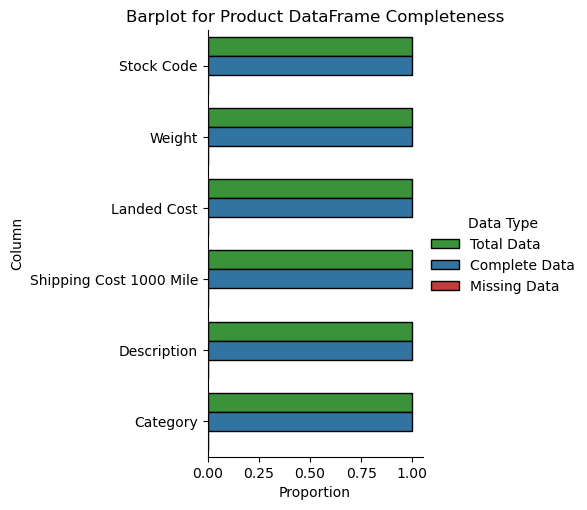

In [99]:
product_df_columns = list(product_df.columns)
plot_completeness_barplot(df=product_df,column=product_df_columns,df_name="Product")

In [100]:
duplicated_rows = product_df.duplicated(keep=False)
product_df[duplicated_rows]

,stock_code,weight,landed_cost,shipping_cost_1000_mile,description,category


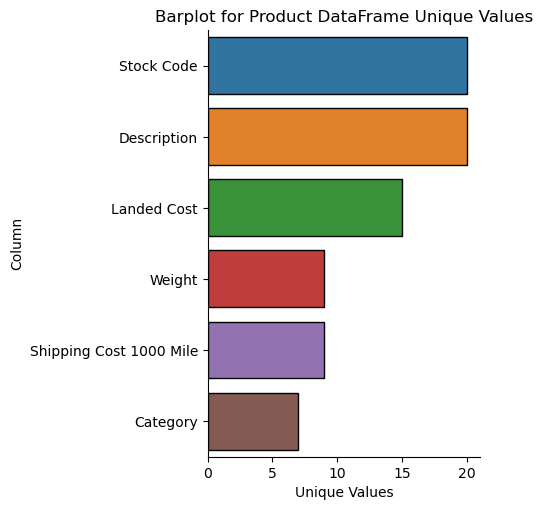

In [101]:
plot_uniqueness_barplot(df=product_df,column=product_df_columns,df_name="Product")

In [102]:
product_df["category"].unique()

array(['Food', 'Disposables', 'Pet Food', 'Cleanig Supplies',
       'Supplements', 'Electronics', 'Grooming'], dtype=object)

In [103]:
product_df["category"] = product_df["category"].astype("category")

In [104]:
product_df["description"].unique()

array(['Taste of the Wild High Prairie Grain-Free Dry Dog Food 40lb',
       'Dog and Puppy Pads',
       'Memory Foam Pet Beds for Small, Medium, and Large Dogs and Cats',
       'Earth Rated Dog Poop Bags', 'Templation Soft Cat Treats',
       'Litter Slide Multi-Cat Scented Clumping Clay Cat Litter',
       'Pet Odor Eliminator', 'ProBiotic Supplements for Dogs',
       'Indoor Pet Camera', 'Sheba Perfect Portions Pat� Wet Cat Food',
       'Purina ONE SmartBlend Natural Adult Chicken 10lb',
       'Milk-Bone MaroSnacks Dog Treats with Real Bone',
       'Pet Hair Remover', 'Canned Cat Food',
       'UltraSound Dog Barking Deterrent',
       'Purina Pro Plan Adult Sensitive Skin',
       'Rechargeable Pet Nail Grinder', 'NexGard Chew for Dogs',
       'Pet Grooming Brush',
       'ChomChom Pet Hair Remover - Reusable Cat and Dog Hair Remover'],
      dtype=object)

In [105]:
product_df["description"] = product_df["description"].astype("category")

In [106]:
inconsistent_rows = product_df[product_df["shipping_cost_1000_mile"] <= 0]["shipping_cost_1000_mile"].count()
inconsistent_rows

np.int64(0)

In [107]:
inconsistent_rows = product_df[product_df["landed_cost"] <= 0]["landed_cost"].count()
inconsistent_rows

np.int64(0)

In [108]:
inconsistent_rows = product_df[product_df["weight"] <= 0]["weight"].count()
inconsistent_rows

np.int64(0)

In [109]:
incosistent_rows = product_df["stock_code"].str.isdigit() == False
product_subset_df = product_df[incosistent_rows]
product_subset_df

,stock_code,weight,landed_cost,shipping_cost_1000_mile,description,category
1,85123A,2.0,6.0,5.0,Dog and Puppy Pads,Disposables
3,85099B,2.0,5.0,4.0,Earth Rated Dog Poop Bags,Disposables


In [110]:
product_df["stock_code"] = product_df["stock_code"].str.replace(r"\D", "", regex=True)
product_df[incosistent_rows]

,stock_code,weight,landed_cost,shipping_cost_1000_mile,description,category
1,85123,2.0,6.0,5.0,Dog and Puppy Pads,Disposables
3,85099,2.0,5.0,4.0,Earth Rated Dog Poop Bags,Disposables


In [111]:
product_df["stock_code"] = product_df["stock_code"].astype("int")

In [112]:
duplicated_rows = product_df.duplicated(keep=False)
product_df[duplicated_rows]

,stock_code,weight,landed_cost,shipping_cost_1000_mile,description,category


In [113]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   stock_code               20 non-null     int64   
 1   weight                   20 non-null     float64 
 2   landed_cost              20 non-null     float64 
 3   shipping_cost_1000_mile  20 non-null     float64 
 4   description              20 non-null     category
 5   category                 20 non-null     category
dtypes: category(2), float64(3), int64(1)
memory usage: 1.8 KB


In [114]:
raw_data_path = data_raw_dir("sale.csv")
sale_df = pd.read_csv(raw_data_path)
sale_df.head()

,transaction_date,customer_id,description,stock_code,invoice_no,quantity,sales,unit_price
0,12/1/2020 8:26,17850.0,Dog and Puppy Pads,85123A,536365.0,1,15.30,15.30
1,12/1/2020 8:34,13047.0,Pet Odor Eliminator,84879,536367.0,6,60.84,10.14
2,12/1/2020 8:34,13047.0,Rechargeable Pet Nail Grinder,22960,536368.0,1,25.50,25.50
3,12/1/2020 9:00,13748.0,Litter Slide Multi-Cat Scented Clumping Clay C...,22086,536371.0,14,214.20,15.30
4,12/1/2020 9:02,17850.0,Dog and Puppy Pads,85123A,536373.0,1,15.30,15.30


In [115]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25065 entries, 0 to 25064
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  25065 non-null  object 
 1   customer_id       20649 non-null  float64
 2   description       25065 non-null  object 
 3   stock_code        25065 non-null  object 
 4   invoice_no        24404 non-null  float64
 5   quantity          25065 non-null  int64  
 6   sales             25065 non-null  float64
 7   unit_price        25065 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ MB


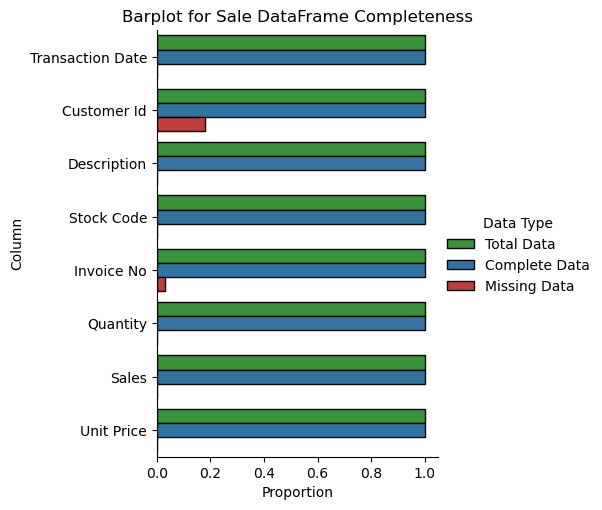

In [116]:
sale_df_columns = list(sale_df.columns)
plot_completeness_barplot(df=sale_df,column=sale_df_columns,df_name="Sale")

In [117]:
duplicated_rows = sale_df.duplicated(keep=False)
sale_df[duplicated_rows]

,transaction_date,customer_id,description,stock_code,invoice_no,quantity,sales,unit_price


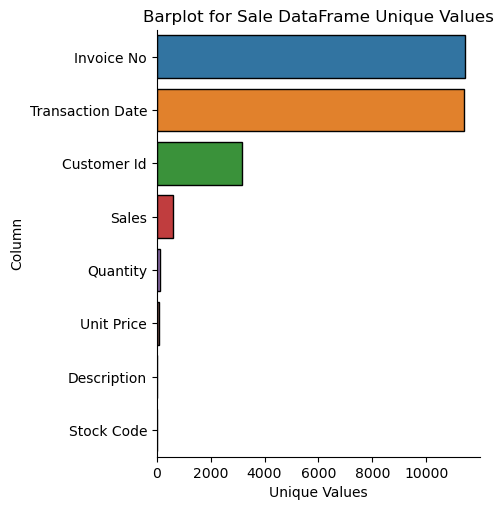

In [118]:
plot_uniqueness_barplot(df=sale_df,column=sale_df_columns,df_name="Sale")

In [119]:
inconsistent_rows = sale_df[sale_df["unit_price"] <= 0]["unit_price"].count()
inconsistent_rows

np.int64(63)

In [120]:
inconsistent_rows = sale_df[sale_df["sales"] <= 0]["sales"].count()
inconsistent_rows

np.int64(724)

In [121]:
inconsistent_rows = sale_df[sale_df["quantity"] <= 0]["quantity"].count()
inconsistent_rows

np.int64(677)

In [122]:
sale_df["invoice_no"] = sale_df["invoice_no"].fillna(-1).astype("int")

In [123]:
incosistent_rows = sale_df["stock_code"].str.isdigit() == False
sale_subset_df = sale_df[incosistent_rows]
sale_subset_df.head()

,transaction_date,customer_id,description,stock_code,invoice_no,quantity,sales,unit_price
0,12/1/2020 8:26,17850.0,Dog and Puppy Pads,85123A,536365,1,15.3,15.3
4,12/1/2020 9:02,17850.0,Dog and Puppy Pads,85123A,536373,1,15.3,15.3
6,12/1/2020 9:32,17850.0,Dog and Puppy Pads,85123A,536375,1,15.3,15.3
12,12/1/2020 9:57,16029.0,Earth Rated Dog Poop Bags,85099B,536386,17,168.3,9.9
14,12/1/2020 10:19,17511.0,Dog and Puppy Pads,85123A,536390,11,168.3,15.3


In [124]:
sale_df["stock_code"] = sale_df["stock_code"].str.replace(r"\D", "", regex=True)
sale_df[incosistent_rows].head()

,transaction_date,customer_id,description,stock_code,invoice_no,quantity,sales,unit_price
0,12/1/2020 8:26,17850.0,Dog and Puppy Pads,85123,536365,1,15.3,15.3
4,12/1/2020 9:02,17850.0,Dog and Puppy Pads,85123,536373,1,15.3,15.3
6,12/1/2020 9:32,17850.0,Dog and Puppy Pads,85123,536375,1,15.3,15.3
12,12/1/2020 9:57,16029.0,Earth Rated Dog Poop Bags,85099,536386,17,168.3,9.9
14,12/1/2020 10:19,17511.0,Dog and Puppy Pads,85123,536390,11,168.3,15.3


In [125]:
sale_df["stock_code"] = sale_df["stock_code"].astype("int")

In [126]:
sale_df["description"].unique()

array(['Dog and Puppy Pads', 'Pet Odor Eliminator',
       'Rechargeable Pet Nail Grinder',
       'Litter Slide Multi-Cat Scented Clumping Clay Cat Litter',
       'ChomChom Pet Hair Remover - Reusable Cat and Dog Hair Remover',
       'Milk-Bone MaroSnacks Dog Treats with Real Bone',
       'Pet Grooming Brush', 'NexGard Chew for Dogs',
       'Earth Rated Dog Poop Bags', 'ProBiotic Supplements for Dogs',
       'Sheba Perfect Portions Pat Wet Cat Food',
       'Indoor Pet Camera (Wi-Fi)', 'Canned Cat Food',
       'Taste of the Wild High Prairie Grain-Free Dry Dog Food 40lb',
       'Memory Foam Pet Beds for Small, Medium, and Large Dogs and Cats',
       'UltraSound Dog Barking Deterrent', 'Indoor Pet Camera',
       'Pet Hair Remover', 'Purina Pro Plan Adult Sensitive Skin',
       'Purina ONE SmartBlend Natural Adult Chicken 10lb',
       'Templation Soft Cat Treats'], dtype=object)

In [127]:
sale_df["description"] = sale_df["description"].astype("category")

In [128]:
sale_df["customer_id"] = sale_df["customer_id"].fillna(-1).astype("int")

In [129]:
sale_df["transaction_date"] = pd.to_datetime(sale_df["transaction_date"])

In [130]:
sale_df.head()

,transaction_date,customer_id,description,stock_code,invoice_no,quantity,sales,unit_price
0,2020-12-01 08:26:00,17850,Dog and Puppy Pads,85123,536365,1,15.30,15.30
1,2020-12-01 08:34:00,13047,Pet Odor Eliminator,84879,536367,6,60.84,10.14
2,2020-12-01 08:34:00,13047,Rechargeable Pet Nail Grinder,22960,536368,1,25.50,25.50
3,2020-12-01 09:00:00,13748,Litter Slide Multi-Cat Scented Clumping Clay C...,22086,536371,14,214.20,15.30
4,2020-12-01 09:02:00,17850,Dog and Puppy Pads,85123,536373,1,15.30,15.30


In [131]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25065 entries, 0 to 25064
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  25065 non-null  datetime64[ns]
 1   customer_id       25065 non-null  int64         
 2   description       25065 non-null  category      
 3   stock_code        25065 non-null  int64         
 4   invoice_no        25065 non-null  int64         
 5   quantity          25065 non-null  int64         
 6   sales             25065 non-null  float64       
 7   unit_price        25065 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(4)
memory usage: 1.4 MB


In [132]:
duplicated_rows = sale_df.duplicated(keep=False)
sale_df[duplicated_rows]

,transaction_date,customer_id,description,stock_code,invoice_no,quantity,sales,unit_price
